In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


In [2]:
data = pd.read_csv(r"/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/cleaned_data.csv")
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [3]:
#Reference Date for Recency Calculation
reference_date = data['InvoiceDate'].max() + timedelta(days=1)


In [4]:
#Create RFM Table
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [5]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2094.88


In [6]:
print(rfm.describe())


         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


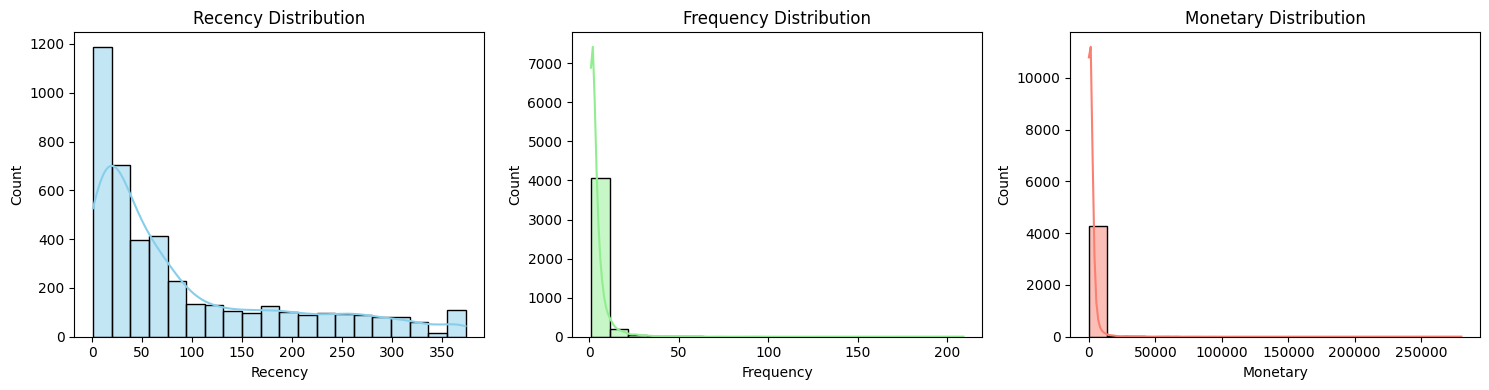

In [7]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='lightgreen')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True, color='salmon')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


In [8]:
rfm_path = "/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/rfm_data.csv"
rfm.to_csv(rfm_path, index=False)
print(f"RFM data saved to {rfm_path}")


RFM data saved to /Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/rfm_data.csv
